In [1]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
import pickle
import time
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,Conv2DTranspose,UpSampling2D
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
import random
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
address='/content/drive/MyDrive/mtech_project/cnn_data'

In [4]:
os.chdir(address)

In [5]:
import matplotlib.pyplot as plt
def map(x,y,colour,file_saved,labels='Temperature(in K)'):

  plt.scatter(x,y,s=25,c=colour,cmap=plt.cm.get_cmap("cool",15))
  cbar=plt.colorbar(orientation="horizontal",extend="both")
  cbar.set_label(label=labels,size=15)
  address='/content/drive/MyDrive/mtech_project/images/'
  plt.savefig(address+file_saved+".png")
  return plt

In [6]:
def load(file_name='final_final'):

  with open(file_name+'.npy', 'rb') as f:

    x_train=np.load(f,allow_pickle=True)
    y_train=np.load(f,allow_pickle=True)
    y_mask_train=np.load(f,allow_pickle=True)
    x_coo_train=np.load(f,allow_pickle=True)
    y_coo_train=np.load(f,allow_pickle=True)

  return x_train,y_train,y_mask_train,x_coo_train,y_coo_train


In [ ]:
x_train,y_train,y_mask_train,x_coo_train,y_coo_train=load(file_name='final_final_4')

In [ ]:
y_train.shape

(1600, 1, 100, 100)

In [ ]:
x_train.max()

1000.0

In [ ]:
x_train[:,0,:,:]=x_train[:,0,:,:]/1000
x_train[:,3,:,:]=x_train[:,3,:,:]/1000


In [ ]:
x_train[:,0,:,:].max()

699.0

In [ ]:
load_file_name="final"
with open(load_file_name+'.npy', 'rb') as f:
    
    x_train=np.load(f,allow_pickle=True)
    y_train=np.load(f,allow_pickle=True)
    y_mask_train=np.load(f,allow_pickle=True)
    x_coo_train=np.load(f,allow_pickle=True)
    y_coo_train=np.load(f,allow_pickle=True)
 

In [ ]:
y_mask_train.shape

(4200, 1, 100, 100)

In [ ]:
address='/content/drive/MyDrive/Colab Notebooks/Mtech_project/'
os.chdir(address)

In [ ]:
x,y,y_mask,x_coo,y_coo=load_examples(0,1,address)

In [ ]:
y.shape

(1, 1, 100, 100)

In [ ]:
for i in range(100):
  for j in range(100):
    if x_train[4,8,i,j]>0.95:
      print(y_train[415,0,i,j])

615.0
615.0
615.0
615.0
651.797
661.482
651.797
615.0
615.0
661.482
651.797
661.482
615.0
651.797
680.367
661.482
615.0
661.482
651.797
661.482
615.0
615.0
651.797
661.482
651.797
615.0
615.0
615.0
615.0


In [ ]:
for i in range(100):
  for j in range(100):
    if x_train[0,8,i,j]>0.95:
      print(y_train[0,0,i,j])

200.0
200.0
200.0
200.0
236.797
246.482
236.797
200.0
200.0
246.482
236.797
246.482
200.0
236.797
265.367
246.482
200.0
246.482
236.797
246.482
200.0
200.0
236.797
246.482
236.797
200.0
200.0
200.0
200.0


In [ ]:
for i in range(100):
  for j in range(100):
    if x_train[2499,1,i,j]>0.95:
      print(x_train[2499,0,i,j])

699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0
699.0


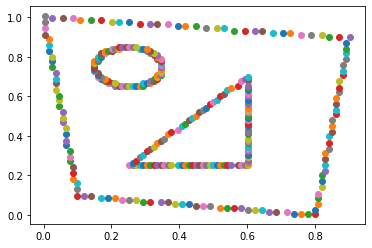

In [ ]:
#To check boundary points(set->(0,1,i,j)) or internal points (set->(0,2,i,j))
example_no=400
for i in range(100):
  for j in range(100):
    if x_train[example_no,1,i,j]>0.95:
      plt.scatter(x_coo_train[example_no,0,i,j],y_coo_train[example_no,0,i,j])


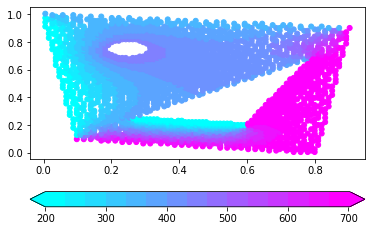

In [ ]:

# To see temperature at boundary and internal points
example_no=1
x=[]
y=[]
temp=[]
for i in range(100):
  for j in range(100):
    if x_train[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      temp.append(y_train[example_no,0,i,j])

plt.scatter(x,y,s=25,c=temp,cmap=plt.cm.get_cmap("cool",15))
cbar=plt.colorbar(orientation="horizontal",extend="both")
      



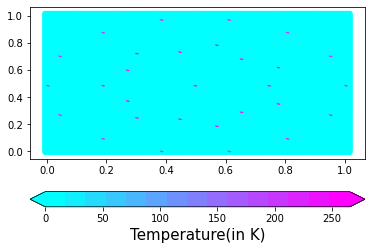

In [ ]:
#To check temp at boundary,internal and do not care points(0k)
#Advised to not check this as do not care points would overwhelm the plot and making it look like temp is zero everywhere

plt=map(x_coo_train[0,0].flatten(),y_coo_train[0,0].flatten(),y_train[0,0].flatten(),file_saved="figure_8",labels='Temperature(in K)')


In [ ]:
print("internal points-->",(x_train[10,2,:,:]>0.95).sum())
print("external points-->",(x_train[10,1]>0.95).sum())


internal points--> 2224
external points--> 244


In [ ]:
x_train.shape

(1600, 9, 100, 100)

In [ ]:
np.array_equal(y_train,y)

False

In [ ]:
y_mask_train[19]

IndexError: ignored

In [ ]:
address='/content/drive/MyDrive/Colab Notebooks/Mtech_project/data_folder/rectangular_6000/'
with open(address+'rectangular_6000_ex_0'+'.npy', 'rb') as f:
  
  feature = np.load(f,allow_pickle=True)
  true = np.load(f,allow_pickle=True)
  x = np.load(f,allow_pickle=True)
  y = np.load(f,allow_pickle=True)

In [ ]:
(feature[8,:,:]>0.95).sum() 

5761

In [ ]:
feature[0,:,:]

array([[   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0., 1000., 1000., ...,    0., 1000.,    0.],
       [   0.,  200.,    0., ...,    0., 1000.,    0.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,  200.,  200., ...,    0.,  200.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

In [ ]:
true.shape

(1, 100, 100)

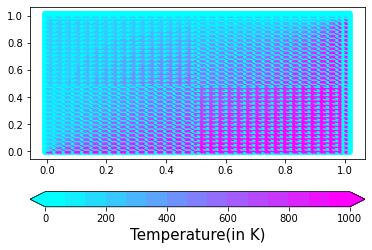

In [ ]:
plt=map(x.flatten(),y.flatten(),true.flatten(),file_saved="figure_8",labels='Temperature(in K)')

In [ ]:
true.shape

(1, 100, 100)

In [ ]:
x=np.zeros((1,4,9,9))
x = layers.Conv2DTranspose(7, 6, 2,data_format="channels_first", padding="same")(x)
x.shape

TensorShape([1, 7, 18, 18])

In [ ]:
def model_6(input_shape):

  # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    print("hello")

    #downscale
    #first block
    X = MaxPooling2D((2, 2),data_format="channels_first", name='max_pool_1')(X_input)
    X = Conv2D(18, (2, 2), strides = (1, 1),activation='sigmoid',padding="same", data_format="channels_first",name = 'conv1')(X)

    #second block
    #X = MaxPooling2D((2, 2),data_format="channels_first", name='max_pool_2')(X)
    X = Conv2D(36, (2, 2), strides = (1, 1),activation='relu', data_format="channels_first",name = 'conv2')(X)

   
    #upscale
    #fourth block
    X=UpSampling2D((2,2),data_format="channels_first",name='upscale_1')(X)
    X = Conv2D(18, (2, 2), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv4')(X)

    #fifth block
    #X=UpSampling2D((2,2),data_format="channels_first",name='upscale_2')(X)
    #X = Conv2D(18, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv5')(X)

    #sixth block
    X=Conv2DTranspose(8,(3,3),strides=(1,1),data_format="channels_first",name = 'conv_trans1')(X)

    #seventh block
    #X=UpSampling2D((2,2),data_format="channels_first",name='upscale_3')(X)
    #X = Conv2D(8, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv6')(X)

    #eighth block
    X = Conv2D(4, (2, 2), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv7')(X)

    #ninth block
    X = Conv2D(2, (2, 2), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv8')(X)

    #tenth block
    X = Conv2D(1, (2, 2), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv9')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Model')

    return model

In [ ]:
input=np.zeros((9,100,100))
model_small=model_6(input.shape)

hello


In [ ]:
model_small.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 9, 6, 6)]         0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 9, 3, 3)           0         
                                                                 
 conv1 (Conv2D)              (None, 18, 3, 3)          666       
                                                                 
 conv2 (Conv2D)              (None, 36, 2, 2)          2628      
                                                                 
 upscale_1 (UpSampling2D)    (None, 36, 4, 4)          0         
                                                                 
 conv4 (Conv2D)              (None, 18, 4, 4)          2610      
                                                                 
 conv_trans1 (Conv2DTranspos  (None, 8, 6, 6)          1304  

In [ ]:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.math.abs(y_true - y_pred)
    return tf.math.reduce_sum(squared_difference)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Iterate over the batches of a dataset.
for i in range(1000):

  with tf.GradientTape() as tape:
      logits = model_small(x_train)

      logits=tf.multiply(logits,tf.constant(y_mask,dtype='float32'))
      # Compute the loss value for this batch.
      loss_value = my_loss_fn(y_train, logits)
      print("loss=",loss_value)

  # Update the weights of the model to minimize the loss value.
  gradients = tape.gradient(loss_value, model_small.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model_small.trainable_weights))


loss= tf.Tensor(19.306458, shape=(), dtype=float32)
loss= tf.Tensor(34.52571, shape=(), dtype=float32)
loss= tf.Tensor(18.162811, shape=(), dtype=float32)
loss= tf.Tensor(9.334457, shape=(), dtype=float32)
loss= tf.Tensor(13.751205, shape=(), dtype=float32)
loss= tf.Tensor(6.6076202, shape=(), dtype=float32)
loss= tf.Tensor(9.502274, shape=(), dtype=float32)
loss= tf.Tensor(12.3186035, shape=(), dtype=float32)
loss= tf.Tensor(7.499466, shape=(), dtype=float32)
loss= tf.Tensor(4.4120483, shape=(), dtype=float32)
loss= tf.Tensor(6.486084, shape=(), dtype=float32)
loss= tf.Tensor(2.1395416, shape=(), dtype=float32)
loss= tf.Tensor(4.755249, shape=(), dtype=float32)
loss= tf.Tensor(3.3027954, shape=(), dtype=float32)
loss= tf.Tensor(3.7917938, shape=(), dtype=float32)
loss= tf.Tensor(4.03006, shape=(), dtype=float32)
loss= tf.Tensor(1.461792, shape=(), dtype=float32)
loss= tf.Tensor(0.84310913, shape=(), dtype=float32)
loss= tf.Tensor(0.6117859, shape=(), dtype=float32)
loss= tf.Tensor(1.4

In [ ]:
my_loss_fn(y_train, model_small(x_train)*y_mask)

<tf.Tensor: shape=(), dtype=float32, numpy=3.076004>

In [ ]:
y_train

array([[[[   0.        ,    0.        ,    0.        ,    0.        ,
             0.        ,    0.        ],
         [   0.        , 1000.        , 1000.        ,    0.        ,
          1000.        ,    0.        ],
         [   0.        ,  200.        ,  600.07501221,    0.        ,
          1000.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ,  516.63500977,
             0.        ,    0.        ],
         [   0.        ,  200.        ,  200.        ,    0.        ,
           200.        ,    0.        ],
         [   0.        ,    0.        ,    0.        ,    0.        ,
             0.        ,    0.        ]]]])

In [ ]:
X_input = Input(feature.shape)
#print(X_input.shape)
X = ZeroPadding2D((1, 1),data_format="channels_first")(X_input)

X = Conv2D(8, (3, 3), strides = (1, 1), data_format="channels_first",name = 'conv0')(X)
#print(X.shape)
X = Activation('relu')(X)
#print(X.shape)
X = MaxPooling2D((2, 2),data_format="channels_first", name='max_pool')(X)
print(X.shape)
X=Conv2DTranspose(4,(5,5),strides=(1,1),data_format="channels_first",name = 'conv_rev0')(X)
print(X.shape)
X=UpSampling2D((2,2),data_format="channels_first")(X)
print(X.shape)
X=Conv2D(2, (3, 3), strides = (1, 1),padding="same" ,data_format="channels_first",name = 'conv0')(X)
print(X.shape)



(None, 8, 10, 10)
(None, 4, 14, 14)
(None, 4, 28, 28)
(None, 2, 28, 28)


In [ ]:
def model(input_shape):

  # Define the input placeholder as a tensor with shape input_shape. Think of this as your input image!
    X_input = Input(input_shape)
    print("hello")

    #downscale
    #first block
    X = MaxPooling2D((2, 2),data_format="channels_first", name='max_pool_1')(X_input)
    X = Conv2D(18, (5, 5), strides = (1, 1),activation='sigmoid',padding="same", data_format="channels_first",name = 'conv1')(X)

    #second block
    X = MaxPooling2D((2, 2),data_format="channels_first", name='max_pool_2')(X)
    X = Conv2D(36, (5, 5), strides = (1, 1),activation='sigmoid',padding="same", data_format="channels_first",name = 'conv2')(X)

    #third block
    X = Conv2D(72, (5, 5), strides = (2, 2), activation='relu',data_format="channels_first",name = 'conv3')(X)

    #upscale
    #fourth block
    X=UpSampling2D((2,2),data_format="channels_first",name='upscale_1')(X)
    X = Conv2D(36, (5, 5), strides = (1, 1),activation='relu',padding="same", data_format="channels_first",name = 'conv4')(X)

    #fifth block
    X=UpSampling2D((2,2),data_format="channels_first",name='upscale_2')(X)
    X = Conv2D(18, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv5')(X)

    #sixth block
    X=Conv2DTranspose(16,(7,7),strides=(1,1),data_format="channels_first",name = 'conv_trans1')(X)

    #seventh block
    X=UpSampling2D((2,2),data_format="channels_first",name='upscale_3')(X)
    X = Conv2D(8, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv6')(X)

    #eighth block
    X = Conv2D(4, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv7')(X)

    #ninth block
    X = Conv2D(2, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv8')(X)

    #tenth block
    X = Conv2D(1, (5, 5), strides = (1, 1),padding="same", data_format="channels_first",name = 'conv9')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Model')

    return model

In [ ]:
input=np.zeros((9,100,100))

In [ ]:
model_new=model(input.shape)

hello


In [ ]:
model_new.summary()

Model: "Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9, 100, 100)]     0         
                                                                 
 max_pool_1 (MaxPooling2D)   (None, 9, 50, 50)         0         
                                                                 
 conv1 (Conv2D)              (None, 18, 50, 50)        4068      
                                                                 
 max_pool_2 (MaxPooling2D)   (None, 18, 25, 25)        0         
                                                                 
 conv2 (Conv2D)              (None, 36, 25, 25)        16236     
                                                                 
 conv3 (Conv2D)              (None, 72, 11, 11)        64872     
                                                                 
 upscale_1 (UpSampling2D)    (None, 72, 22, 22)        0     

In [ ]:
def loss(model,x_test,y_test,y_mask_test):
  no_of_examples=x_test.shape[0]
  logits = model(x_test)
  logits=tf.multiply(logits,tf.constant(y_mask_test,dtype='float32'))
  y=tf.multiply(y_test,tf.constant(y_mask_test,dtype='float32'))
  loss_value = tf.math.abs(logits - y)
  loss_value=tf.math.reduce_sum(loss_value)/(no_of_examples)

  return loss_value




In [ ]:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.math.abs(y_true - y_pred)
    return tf.math.reduce_sum(squared_difference)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

# Iterate over the batches of a dataset.
for i in range(10000):

  with tf.GradientTape() as tape:
      logits = model_new(x_train[0:200,:,:,:])

      logits=tf.multiply(logits,tf.constant(y_mask_train[0:200,:,:,:],dtype='float32'))
      y=tf.multiply(y_train[0:200,:,:,:],tf.constant(y_mask_train[0:200,:,:,:],dtype='float32'))
      # Compute the loss value for this batch.
      loss_value = my_loss_fn(y, logits)
      print("loss=",loss_value/(200))

  # Update the weights of the model to minimize the loss value.
  gradients = tape.gradient(loss_value, model_new.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model_new.trainable_weights))



  #model_new.compile(optimizer='adam', loss=my_loss_fn )

NameError: ignored

In [ ]:
x_train.shape[0]

100

In [ ]:
loss(model_new,x_train[1:2,:,:,:],y_train[1:2,:,:,:],y_mask_train[1:2,:,:,:])

NameError: ignored

In [ ]:
model_new.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
model_new= keras.models.load_model("my_model")

In [ ]:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.math.abs(y_true - y_pred)
    return tf.math.reduce_sum(squared_difference)


optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)

# Iterate over the batches of a dataset.
for i in range(10000):

  with tf.GradientTape() as tape:
      logits = model_new(x_train[0:200,:,:,:])

      logits=tf.multiply(logits,tf.constant(y_mask_train[0:200,:,:,:],dtype='float32'))
      y=tf.multiply(y_train[0:200,:,:,:],tf.constant(y_mask_train[0:200,:,:,:],dtype='float32'))
      # Compute the loss value for this batch.
      loss_value = my_loss_fn(y, logits)
      print("loss=",loss_value/(200))

  # Update the weights of the model to minimize the loss value.
  gradients = tape.gradient(loss_value, model_new.trainable_weights)
  optimizer.apply_gradients(zip(gradients, model_new.trainable_weights))


Streaming output truncated to the last 5000 lines.
loss= tf.Tensor(751.1716, shape=(), dtype=float32)
loss= tf.Tensor(751.18915, shape=(), dtype=float32)
loss= tf.Tensor(751.1618, shape=(), dtype=float32)
loss= tf.Tensor(751.18414, shape=(), dtype=float32)
loss= tf.Tensor(751.1766, shape=(), dtype=float32)
loss= tf.Tensor(751.16235, shape=(), dtype=float32)
loss= tf.Tensor(751.1742, shape=(), dtype=float32)
loss= tf.Tensor(751.16815, shape=(), dtype=float32)
loss= tf.Tensor(751.1722, shape=(), dtype=float32)
loss= tf.Tensor(751.1566, shape=(), dtype=float32)
loss= tf.Tensor(751.1657, shape=(), dtype=float32)
loss= tf.Tensor(751.1678, shape=(), dtype=float32)
loss= tf.Tensor(751.169, shape=(), dtype=float32)
loss= tf.Tensor(751.15594, shape=(), dtype=float32)
loss= tf.Tensor(751.17206, shape=(), dtype=float32)
loss= tf.Tensor(751.1707, shape=(), dtype=float32)
loss= tf.Tensor(751.1831, shape=(), dtype=float32)
loss= tf.Tensor(751.1527, shape=(), dtype=float32)
loss= tf.Tensor(751.1788, 

KeyboardInterrupt: ignored

In [ ]:
loss(reconstructed_model,x_train[1:2,:,:,:],y_train[1:2,:,:,:],y_mask_train[1:2,:,:,:])

InvalidArgumentError: ignored

In [ ]:
my_loss_fn(y_train, tf.multiply(model_new(x_train),tf.constant(y_mask,dtype='float32')))

<tf.Tensor: shape=(), dtype=float32, numpy=747.9423>

In [ ]:
model_new(x_train)

<tf.Tensor: shape=(1, 1, 100, 100), dtype=float32, numpy=
array([[[[ 0.03182999,  0.074269  ,  0.05774471, ..., -0.03270201,
          -0.02196316, -0.00269577],
         [ 0.02463735,  0.07370462,  0.0661865 , ...,  0.00075054,
          -0.00122146,  0.01991178],
         [ 0.0075545 ,  0.0896277 ,  0.08228895, ..., -0.05108632,
          -0.04703828, -0.01243138],
         ...,
         [-0.0084378 , -0.02311027, -0.01747324, ...,  0.02664867,
           0.00677759,  0.00293548],
         [-0.060652  , -0.0189124 , -0.02017425, ...,  0.01303354,
          -0.00491502,  0.00136649],
         [-0.03844513, -0.03225325, -0.03937155, ...,  0.00955122,
          -0.03127758, -0.00954059]]]], dtype=float32)>

In [ ]:
tf.math.reduce_sum(tf.math.abs(y_train-model_new(x_train)))

<tf.Tensor: shape=(), dtype=float32, numpy=69223.98>

In [ ]:
a=model_new(x_train)

In [ ]:
model_new.fit(x_train, y_train, epochs = 1000, batch_size = 1)

Epoch 1/1000
1/1 [==============================] - 0s 16ms/step - loss: 69398.8594
Epoch 2/1000
1/1 [==============================] - 0s 12ms/step - loss: 69014.9688
Epoch 3/1000
1/1 [==============================] - 0s 13ms/step - loss: 68770.4297
Epoch 4/1000
1/1 [==============================] - 0s 11ms/step - loss: 68602.7812
Epoch 5/1000
1/1 [==============================] - 0s 18ms/step - loss: 68470.5000
Epoch 6/1000
1/1 [==============================] - 0s 10ms/step - loss: 68359.4297
Epoch 7/1000
1/1 [==============================] - 0s 15ms/step - loss: 68254.9141
Epoch 8/1000
1/1 [==============================] - 0s 17ms/step - loss: 68155.4062
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 68082.7578
Epoch 10/1000
1/1 [==============================] - 0s 11ms/step - loss: 68017.3125
Epoch 11/1000
1/1 [==============================] - 0s 11ms/step - loss: 67959.1016
Epoch 12/1000
1/1 [==============================] - 0s 11ms/step - loss: 

In [ ]:
def double_conv_block(x, n_filters,status="same"):
   # Conv2D then ReLU activation
   if status=="same":
    x = layers.Conv2D(n_filters, 3, padding = "same",  data_format="channels_first",
                      activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "same", data_format="channels_first", 
                      activation = "relu", kernel_initializer = "he_normal")(x) 

   elif status=="valid":
    x = layers.Conv2D(n_filters, 3, padding = "valid",  data_format="channels_first",
                      activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = layers.Conv2D(n_filters, 3, padding = "valid", data_format="channels_first", 
                      activation = "relu", kernel_initializer = "he_normal")(x) 

   else:
     print("Choose either same or valid in status")

   return x


In [ ]:
def downsample_block(x, n_filters,status="valid"):
   f = double_conv_block(x, n_filters,status)
   p = layers.MaxPool2D(2, data_format="channels_first")(f)
  
   return f, p

In [ ]:
def upsample_block(x, conv_features, n_filters):
   # upsample
   x = layers.Conv2DTranspose(n_filters, 3, 1, padding="valid", data_format="channels_first")(x)
   x = layers.Conv2DTranspose(n_filters, 3, 1, padding="valid", data_format="channels_first")(x)
   x = layers.Conv2DTranspose(n_filters, 3, 2, padding="same", data_format="channels_first")(x)
   # concatenate
   x = layers.Concatenate(axis=1)([x, conv_features])
  
   x = double_conv_block(x, n_filters)
   return x

In [ ]:
def model_U(shape):

  inputs = layers.Input(shape=(3,100,100))
  
  f1, p1 = downsample_block(inputs, 64,status="valid")
 
  f2, p2 = downsample_block(p1, 128,status="valid")
  
  bottleneck = double_conv_block(p2, 256,status="valid")
  
  u3 = upsample_block(bottleneck, f2, 128)
  
  u5 = upsample_block(u3, f1, 64)
 
  u6 = layers.Conv2DTranspose(32,3, 1, padding="valid",data_format="channels_first")(u5)
  outputs=layers.Conv2DTranspose(1,3, 1, padding="valid",data_format="channels_first")(u6)
  
  unet_model = tf.keras.Model(inputs, outputs, name="U-Net")
  return unet_model

In [ ]:
input=np.zeros((3,100,100))

In [ ]:
model_new=model_U(input.shape)

In [ ]:
model_new.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 3, 100, 100  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 64, 98, 98)   1792        ['input_1[0][0]']                
                                                                                                  
 conv2d_1 (Conv2D)              (None, 64, 96, 96)   36928       ['conv2d[0][0]']                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 64, 48, 48)   0           ['conv2d_1[0][0]']           

In [10]:
def loss(model,x_test,y_test,y_mask_test):
  no_of_examples=x_test.shape[0]
  logits = model(x_test)
  logits=tf.multiply(logits,tf.constant(y_mask_test,dtype='float32'))
  y=tf.multiply(y_test,tf.constant(y_mask_test,dtype='float32'))
  loss_value = tf.math.abs(logits - y)
  loss_value=tf.math.reduce_sum(loss_value)/(no_of_examples)

  return loss_value

In [11]:
def prediction(model,x_test,y_mask_test):
  no_of_examples=x_test.shape[0]
  y_predicted=np.zeros((no_of_examples,1,100,100))
  
  y_predicted=model(x_test)
  y_predicted=np.multiply(y_predicted,y_mask_test)+np.multiply(x_test[:,0:1,:,:],x_test[:,1:2,:,:])

  return y_predicted
    
    


In [12]:
def no_of_internal_points(x_test):
   no_of_examples=x_test.shape[0]
   total=0
   #no_internal_points=(x_batch[j][0,2,:,:]>0.95).sum()
   for i in range(no_of_examples):
     total=total+(x_test[i,2,:,:]>0.95).sum()
   return total



In [13]:
def predict_loss(model,x_test,y_mask_test,y_test):
  no_of_examples=x_test.shape[0]
  y_predicted=np.zeros((no_of_examples,1,100,100))

  y=model(x_test)
  y=tf.multiply(y,tf.constant(y_mask_test,dtype='float32'))
  y_true=tf.multiply(y_test,tf.constant(y_mask_test,dtype='float32'))
  loss_value = my_loss_fn(y, y_true)

  return loss_value



In [14]:
def my_loss_fn(y_true, y_pred):
    squared_difference = tf.math.abs(y_true - y_pred)
    return tf.math.reduce_sum(squared_difference)
    

In [15]:
def train_new(model_new,x_train,y_train,y_mask_train,epocs=1000,batch_size=64,rate=0.000001,printing=True):

  optimizer = tf.keras.optimizers.Adam(learning_rate=rate)
  no_of_examples=x_train.shape[0]
  no_of_batches=int(no_of_examples/batch_size)
  x_batch=[]
  y_batch=[]
  y_mask_batch=[]
  loss=0
  for i in range(no_of_batches):
    x_batch.append(x_train[batch_size*i:batch_size*(i+1),:,:,:])
    y_batch.append(y_train[batch_size*i:batch_size*(i+1),:,:,:])
    y_mask_batch.append(y_mask_train[batch_size*i:batch_size*(i+1),:,:,:])
  x_batch.append(x_train[batch_size*i:,:,:,:])
  y_batch.append(y_train[batch_size*i:,:,:,:])
  y_mask_batch.append(y_mask_train[batch_size*i:,:,:,:])


  # Iterate over the batches of a dataset.
  for i in range(epocs):
    print("epoch no----------------------------->",i)
    overall_error=0
    for j in range(no_of_batches+1):
      size_of_batch=x_batch[j].shape[0]
      no_internal_points=(x_batch[j][0,2,:,:]>0.95).sum()
      #print(no_internal_points)
      with tf.GradientTape() as tape:
          #print(x_train.shape)
          
          logits = model_new(x_batch[j])
          #print(logits.shape)
          #print(y_mask_train.shape)
          logits=tf.multiply(logits,tf.constant(y_mask_batch[j],dtype='float32'))
          y=tf.multiply(y_batch[j],tf.constant(y_mask_batch[j],dtype='float32'))
          # Compute the loss value for this batch.
          loss_value = my_loss_fn(y, logits)
          overall_error=overall_error+(loss_value/(no_of_examples*no_internal_points))
          if j%5==0 and printing:
            print("loss=",loss_value/(size_of_batch))

      # Update the weights of the model to minimize the loss value.
      gradients = tape.gradient(loss_value, model_new.trainable_weights)
      optimizer.apply_gradients(zip(gradients, model_new.trainable_weights))
    loss=overall_error
    print("overall error ---->",overall_error)
  return model_new,loss

In [ ]:
model_new=train_new(model_new,x_train[:,0:3,:,:],y_train,y_mask_train,epocs=1000,batch_size=16,rate=0.00001)

epoch no-----------------------------> 0
loss= tf.Tensor(3759.1091, shape=(), dtype=float32)
loss= tf.Tensor(4936.134, shape=(), dtype=float32)
loss= tf.Tensor(6103.0312, shape=(), dtype=float32)
loss= tf.Tensor(7256.6855, shape=(), dtype=float32)
loss= tf.Tensor(8391.965, shape=(), dtype=float32)
loss= tf.Tensor(9499.65, shape=(), dtype=float32)
loss= tf.Tensor(10567.215, shape=(), dtype=float32)
loss= tf.Tensor(4597.561, shape=(), dtype=float32)
loss= tf.Tensor(5737.3877, shape=(), dtype=float32)
loss= tf.Tensor(6834.037, shape=(), dtype=float32)
loss= tf.Tensor(7865.773, shape=(), dtype=float32)
loss= tf.Tensor(8788.572, shape=(), dtype=float32)
loss= tf.Tensor(9523.055, shape=(), dtype=float32)
loss= tf.Tensor(3900.4868, shape=(), dtype=float32)
loss= tf.Tensor(4633.783, shape=(), dtype=float32)
loss= tf.Tensor(5174.6387, shape=(), dtype=float32)
loss= tf.Tensor(5532.955, shape=(), dtype=float32)
loss= tf.Tensor(5244.217, shape=(), dtype=float32)
loss= tf.Tensor(5374.638, shape=(),

KeyboardInterrupt: ignored

In [ ]:
model_new.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
model_new= keras.models.load_model("my_model")

In [ ]:
y_mask_train.shape

(1600, 1, 100, 100)

In [ ]:
model_new=train_new(model_new,x_train[:,0:3,:,:],y_train,y_mask_train,epocs=1000,batch_size=16,rate=0.000001)

epoch no-----------------------------> 0
loss= tf.Tensor(8233.564, shape=(), dtype=float32)
loss= tf.Tensor(4887.33, shape=(), dtype=float32)
loss= tf.Tensor(4111.829, shape=(), dtype=float32)
loss= tf.Tensor(3535.7434, shape=(), dtype=float32)
loss= tf.Tensor(3271.2998, shape=(), dtype=float32)
loss= tf.Tensor(3555.983, shape=(), dtype=float32)
loss= tf.Tensor(4721.6104, shape=(), dtype=float32)
loss= tf.Tensor(5352.2207, shape=(), dtype=float32)
loss= tf.Tensor(5036.7617, shape=(), dtype=float32)
loss= tf.Tensor(4583.5947, shape=(), dtype=float32)
loss= tf.Tensor(4029.0068, shape=(), dtype=float32)
loss= tf.Tensor(4294.8203, shape=(), dtype=float32)
loss= tf.Tensor(4772.548, shape=(), dtype=float32)
loss= tf.Tensor(6208.1323, shape=(), dtype=float32)
loss= tf.Tensor(4808.1484, shape=(), dtype=float32)
loss= tf.Tensor(4430.6807, shape=(), dtype=float32)
loss= tf.Tensor(4001.1545, shape=(), dtype=float32)
loss= tf.Tensor(4352.6885, shape=(), dtype=float32)
loss= tf.Tensor(4511.423, sha

KeyboardInterrupt: ignored

In [ ]:
def unpack(address):
  


In [16]:
def run(start,end,model_new,loss_train,loss_test,loop=10,epocs=10,batch_size=16,rate=0.000001,save_model='my_model4'):

  loss_at=loss_test
  loss_at_first=loss_train
  x_test,y_test,y_mask_test,x_coo_train,y_coo_train=load('test')
  internal_points=no_of_internal_points(x_test)
  for k in range(loop):
    print("loop number-------------------------------------------------------------------------------------------------------->",k)
    for i in range(start,end):
      print("File number--------------------------------------------------------------------->",i)
      file_name='final_final'+'_'+str(i)
      x_train,y_train,y_mask_train,x_coo_train,y_coo_train=load(file_name)
      model_new,loss=train_new(model_new,x_train[:,0:3,:,:],y_train,y_mask_train,epocs,batch_size,rate,printing=False)
      test_loss=predict_loss(model_new,x_test[:,0:3,:,:],y_mask_test,y_test)
      if i==1:
        loss_at.append(test_loss)
        loss_at_first.append(loss)
      if k%5==0:
        model_new.save(save_model)
        print("The model has been saved...............")


      print("Test loss-------------->",(test_loss/internal_points))
  return model_new,loss_at,loss_at_first







In [ ]:
model,loss_test,loss_train=run(1,18,model_new,loss_train,loss_test,loop=32,epocs=2,batch_size=16,rate=0.000001,save_model='my_model4')

loop number--------------------------------------------------------------------------------------------------------> 0
File number---------------------------------------------------------------------> 1
epoch no-----------------------------> 0
overall error ----> tf.Tensor(6.3638387, shape=(), dtype=float32)
epoch no-----------------------------> 1
overall error ----> tf.Tensor(3.5969164, shape=(), dtype=float32)
INFO:tensorflow:Assets written to: my_model4/assets
The model has been saved...............
Test loss--------------> tf.Tensor(48.029324, shape=(), dtype=float32)
File number---------------------------------------------------------------------> 2
epoch no-----------------------------> 0
overall error ----> tf.Tensor(3.2297707, shape=(), dtype=float32)
epoch no-----------------------------> 1
overall error ----> tf.Tensor(3.2494602, shape=(), dtype=float32)
INFO:tensorflow:Assets written to: my_model4/assets
The model has been saved...............
Test loss--------------> tf.Te

In [ ]:
import pickle

with open("test", "wb") as fp:

  pickle.dump(loss_test, fp)
  pickle.dump(loss_train, fp)




NameError: ignored

In [8]:
import pickle
with open("test", "rb") as fp:

  loss_test = pickle.load(fp)
  loss_train = pickle.load(fp)

In [ ]:
test_l=[]
train_l=[]
for i in loss_test:
  #print(i)
  
  test_l.append((i.numpy())/15000)

for i in loss_train:
  #print(i)
  
  train_l.append(i.numpy())


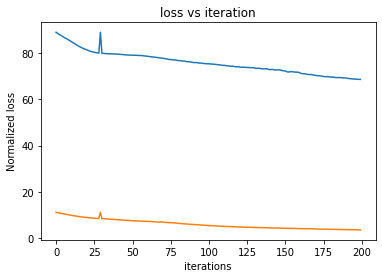

In [ ]:

plt.plot(test_l)
plt.plot(train_l)
  
# naming the x axis
plt.xlabel('iterations')
# naming the y axis
plt.ylabel('Normalized loss')
  
# giving a title to my graph
plt.title('loss vs iteration')
  
# function to show the plot
plt.savefig('train_image_2/hello'+'.png')
plt.show()

In [ ]:
loss_train

[<tf.Tensor: shape=(), dtype=float32, numpy=11.176415>,
 <tf.Tensor: shape=(), dtype=float32, numpy=11.04441>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.914788>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.798914>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.672108>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.542453>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.403538>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.279934>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.154044>,
 <tf.Tensor: shape=(), dtype=float32, numpy=10.0354595>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.919227>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.807671>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.688029>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.572975>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.4674>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.355345>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.258921>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.182274>,
 <

In [ ]:
model.save('my_model7')

NameError: ignored

In [ ]:
model_new.save('my_model3')

NameError: ignored

In [7]:
model_new= keras.models.load_model("my_model7")

In [ ]:
num=18
x_test,y_test,y_mask_test,x_coo_train,y_coo_train=load('final_final_18')
y_predicted=prediction(model_new,x_test[0:1,0:3,:,:],y_mask_test[0:1,:,:,:])
y_loss=np.abs(y_predicted-y_test[0:1,:,:,:])

min_=100
max_=1000

example_no=0
x=[]
y=[]
loss=[]
percentage_loss=[]
true_value=[]
predicted=[]
#minv, maxv = 0, 100
#cmap = plt.cm.tab20
#norm = plt.Normalize(minv, maxv)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ax=ax, label='Values')
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      percentage_loss.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)
      predicted.append(y_predicted[example_no,0,i,j])
      true_value.append(y_test[example_no,0,i,j])


print_pred(num,min_,max_)

print_true(num,min_,max_)
print_error(num)

FileNotFoundError: ignored

In [ ]:
max(percentage_loss)

TypeError: ignored

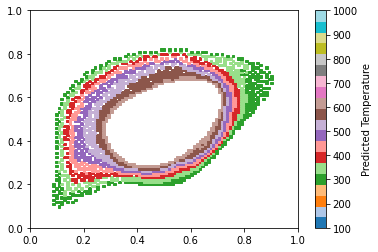

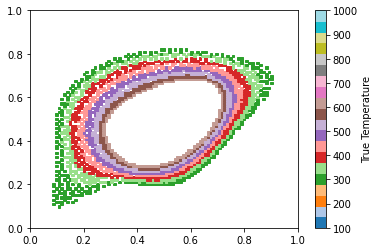

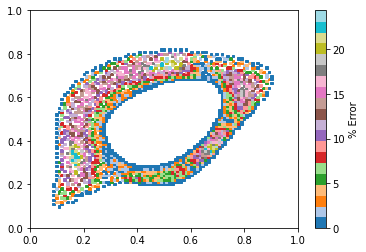

In [ ]:
num=1
x_test,y_test,y_mask_test,x_coo_train,y_coo_train=load('test')
y_predicted=prediction(model_new,x_test[:,0:3,:,:],y_mask_test[:,:,:,:])
y_loss=np.abs(y_predicted-y_test[:,:,:,:])

min_=100
max_=1000
example_no=5
x=[]
y=[]
loss=[]
percentage_loss=[]
true_value=[]
predicted=[]
#minv, maxv = 0, 100
#cmap = plt.cm.tab20
#norm = plt.Normalize(minv, maxv)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ax=ax, label='Values')
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      percentage_loss.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)
      predicted.append(y_predicted[example_no,0,i,j])
      true_value.append(y_test[example_no,0,i,j])


print_pred(example_no,min_,max_)

print_true(example_no,min_,max_)
print_error(example_no)

In [ ]:
x_test.shape

(1600, 9, 100, 100)

In [ ]:
y_predicted.max()

721.9133911132812

In [ ]:
y_predicted.shape

(1, 1, 100, 100)

In [ ]:
y_loss[0,0,55,55]

0.0

In [ ]:
y_loss_percentage=np.divide(y_loss,y_test[0:1,:,:,:])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [ ]:
y_loss.shape

(1, 1, 100, 100)

In [ ]:

example_no=0
x=[]
y=[]
loss=[]
per=[]
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      per.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)


plt.scatter(x,y,s=25,c=per,cmap=plt.cm.get_cmap("tab20",15))
cbar=plt.colorbar(orientation="horizontal",extend="both",label='% Error')
plt.savefig('image_imp/train_+'.png')

SyntaxError: ignored

In [ ]:
example_no=0
x=[]
y=[]
loss=[]
percentage_loss=[]
true_value=[]
predicted=[]
#minv, maxv = 0, 100
#cmap = plt.cm.tab20
#norm = plt.Normalize(minv, maxv)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ax=ax, label='Values')
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      percentage_loss.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)
      predicted.append(y_predicted[example_no,0,i,j])
      true_value.append(y_test[example_no,0,i,j])

In [ ]:
def print_pred(k,min_,max_):
  from matplotlib.patches import Rectangle
  fig, ax = plt.subplots()
  example_no=0
  x_coo=1/97
  y_coo=1/97


  minv, maxv = min_, max_
  cmap = plt.cm.tab20
  norm = plt.Normalize(minv, maxv)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  plt.colorbar(sm, ax=ax, label='Predicted Temperature')

  for i in range(len(loss)):
    patch = Rectangle((x[i]-x_coo/2, y[i]-y_coo/2),x_coo , y_coo,color=cmap(norm(predicted[i])))
    ax.add_patch(patch)

        
      
  plt.savefig('test_image_2/train_predicted_'+str(k)+'.png')      
  #plt.savefig('image_imp/train_predicted_2.png')
  plt.show()

In [ ]:
def print_true(k,min_,max_):
  from matplotlib.patches import Rectangle
  fig, ax = plt.subplots()
  example_no=0
  x_coo=1/97
  y_coo=1/97

  minv, maxv = min_, max_
  cmap = plt.cm.tab20
  norm = plt.Normalize(minv, maxv)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  plt.colorbar(sm, ax=ax, label='True Temperature')

  for i in range(len(loss)):
    patch = Rectangle((x[i]-x_coo/2, y[i]-y_coo/2),x_coo , y_coo,color=cmap(norm(true_value[i])))
    ax.add_patch(patch)

        
      
  plt.savefig('test_image_2/train_true_'+str(k)+'.png')      
  #plt.savefig('image_imp/train_true_2.png')

  plt.show()

In [ ]:
def print_error(k):
  from matplotlib.patches import Rectangle
  fig, ax = plt.subplots()
  example_no=0
  x_coo=1/97
  y_coo=1/97

  minv, maxv = min(percentage_loss), max(percentage_loss)
  cmap = plt.cm.tab20
  norm = plt.Normalize(minv, maxv)
  sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
  sm.set_array([])
  plt.colorbar(sm, ax=ax, label='% Error')

  for i in range(len(loss)):
    patch = Rectangle((x[i]-x_coo/2, y[i]-y_coo/2),x_coo , y_coo,color=cmap(norm(percentage_loss[i])))
    ax.add_patch(patch)

        
      
  plt.savefig('test_image_2/train_error_'+str(k)+'.png')      
  #plt.savefig('image_imp/train_error_2.png')

  plt.show()

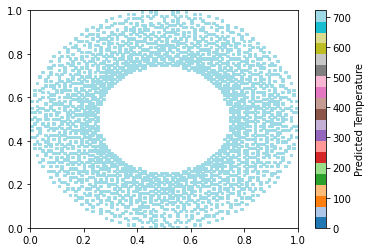

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
example_no=0
x_coo=1/97
y_coo=1/97
x=[]
y=[]
loss=[]
per=[]
true_value=[]
predicted=[]
#minv, maxv = 0, 100
#cmap = plt.cm.tab20
#norm = plt.Normalize(minv, maxv)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ax=ax, label='Values')
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      per.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)
      predicted.append(y_predicted[example_no,0,i,j])
      
      
     
      patch = Rectangle((x_coo_train[example_no,0,i,j]-x_coo/2, y_coo_train[example_no,0,i,j]-y_coo/2),x_coo , y_coo,color=cmap(norm(y_predicted[example_no,0,i,j])))
      ax.add_patch(patch)
plt.savefig('image/train_1.png')
minv, maxv = 0, max(predicted)
cmap = plt.cm.tab20
norm = plt.Normalize(minv, maxv)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Predicted Temperature')
plt.show()

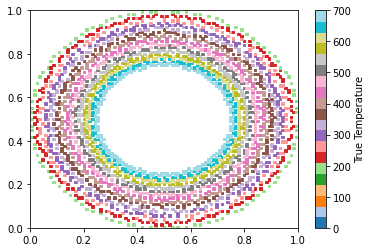

In [ ]:
# true value
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
example_no=0
x_coo=1/97
y_coo=1/97
x=[]
y=[]
loss=[]
per=[]
true_value=[]
predicted=[]
#minv, maxv = 0, 100
#cmap = plt.cm.tab20
#norm = plt.Normalize(minv, maxv)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ax=ax, label='Values')
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      per.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)
      true_value.append(y_test[example_no,0,i,j])
      
      #print(y_test[example_no,0,i,j])
      patch = Rectangle((x_coo_train[example_no,0,i,j]-x_coo/2, y_coo_train[example_no,0,i,j]-y_coo/2),x_coo , y_coo,color=cmap(norm(y_test[example_no,0,i,j])))
      ax.add_patch(patch)
plt.savefig('image/train_1.png')
minv, maxv = 0, max(true_value)
cmap = plt.cm.tab20
norm = plt.Normalize(minv, maxv)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='True Temperature')
plt.show()

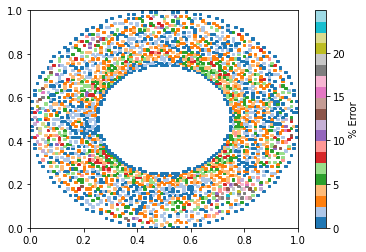

In [ ]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
example_no=0
x_coo=1/97
y_coo=1/97
x=[]
y=[]
loss=[]
per=[]
true_value=[]
predicted=[]
#minv, maxv = 0, 100
#cmap = plt.cm.tab20
#norm = plt.Normalize(minv, maxv)
#sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#sm.set_array([])
#plt.colorbar(sm, ax=ax, label='Values')
for i in range(100):
  for j in range(100):
    if x_test[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])
      per.append((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)
      
      
     
      patch = Rectangle((x_coo_train[example_no,0,i,j]-x_coo/2, y_coo_train[example_no,0,i,j]-y_coo/2),x_coo , y_coo,color=cmap(norm((y_loss[example_no,0,i,j]/y_test[example_no,0,i,j])*100)))
      ax.add_patch(patch)
plt.savefig('image/train_1.png')
minv, maxv = 0, max(per)
cmap = plt.cm.tab20
norm = plt.Normalize(minv, maxv)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='% Error')
plt.show()


#plt.scatter(x,y,s=25,c=per,cmap=plt.cm.get_cmap("tab20",15))
#cbar=plt.colorbar(orientation="horizontal",extend="both")

In [ ]:
example_no=0
x=[]
y=[]
loss=[]


for i in range(100):
  for j in range(100):
    if x_train[example_no,8,i,j]>0.95:
      x.append(x_coo_train[example_no,0,i,j])
      y.append(y_coo_train[example_no,0,i,j])
      loss.append(y_loss[example_no,0,i,j])

plt.scatter(x,y,s=25,c=loss,cmap=plt.cm.get_cmap("cool",15))
cbar=plt.colorbar(orientation="horizontal",extend="both")
      


NameError: ignored